<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno está basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> This notebook was generated for TensorFlow 2.6.

# Clasificación y regresión con redes neuronales: glosario

Los casos de uso más habituales con redes neuronales son problemas de clasificación (binaria o multiclase) o regresión:
* Clases: conjunto posible de etiquetas del problema.
* Etiqueta: especifica a una muestra/patrón (la imagen #345 está etiquetada como "gato")
* Clasificación binaria: clasificación con dos categorías excluyentes
* Clasificación multiclase: tenemos varias categorías excluyentes.
* Clasificación multi-etiqueta: a cada muestra se le puede asignar varias etiquetas.
* Regresión escalar: la variable objetivo es una variable continua escalar.
* Regresión vectorial/vector: la variable objetivo es un vector de valores continuos, por ejemplo las coordenadas de un rectángulo donde se encuentra un objeto.
* Lote/batch/mini-bach: un conjunto pequeño de muestras que se procesa simultáneamente (en entrenamiento o en inferencia) por las limitaciones de memoria. Normalmente se expresa en potencias de 2 entre 8 y 128.

## Ejemplo de clasificación binaria: reseñas de películas

### El conjunto de datos IMDB

Conjunto de datos IMDB: un conjunto de 50.000 reseñas **muy polarizadas** de la Internet Movie Database. Se dividen en 25.000 críticas para entrenamiento y 25.000 críticas para test, cada conjunto consta de un 50% de críticas negativas y un 50% de críticas positivas.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB está disponible en Keras. Ya ha sido preprocesado: las reseñas (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica de un diccionario (reducido). Esto nos permite centrarnos en la construcción, entrenamiento y la evaluación del modelo.

**Cargar el conjunto de datos IMDB**
`num_words=10000` filtra a las palabras más frecuentes en los datos de entrenamiento de las 88.585 disponibles.



In [133]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Las variables `train_data` y `test_data` son una secuencia de índices de las palabras de cada reseña.

Las etiquetas 0 y 1 significan que la reseña es *negativa* o *positiva* respectivamente.

In [134]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [135]:
train_labels[0]

np.int64(1)

Como nos limitamos a las 10.000 palabras más frecuentes, ningún índice de palabras superará las 10.000:

In [136]:
max([max(sequence) for sequence in train_data])

9999

**Decodificar el texto de una reseña**

In [137]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # Los 3 primeros índices están reservados
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Ejemplo de una reseña negativa

In [138]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_review)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
? this has to be one of the worst films of the 1990s when 

### Preparación de los datos

Las redes neuronales necesitan trabajar con datos del mismo tamaño. Por tanto , no se pueden introducir directamente listas variables de enteros en la red neuronal y tenemos que **convertir las listas en tensores**. Hay dos maneras de hacerlo:

 * Rellenar las listas para que todas tengan la misma longitud como un tensor entero de la forma (muestras, longitud_máxima), y utilizar una capa que pueda procesar directamente enteros como la capa tipo [`Embedding`](https://keras.io/api/layers/core_layers/embedding/). Ver [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) para ampliar.

* *Multi-hot encode*: Codificar las listas para convertirlas en vectores de 0s y 1s. Por ejemplo, convertir la secuencia [8, 5] en un vector de 10.000 dimensiones que sería todo 0s excepto los índices 8 y 5, que serían 1s. Así ya se podría usar una capa `Dense`, capaz de manejar datos vectoriales de punto flotante, como la primera capa del modelo.

**Codificando las secuencias de enteros como *multi-hot encoding***

Vectorización de los datos de entrada:

In [139]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [140]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorización de las etiquetas y transformación a `float32`:

In [141]:
print(type(train_labels))
print(type(train_labels[0]))


<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [142]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Construcción del modelo

Despues del preprocesamiento, los datos de entrada son vectores, y las etiquetas son escalares (1s y 0s). Esta es una de las configuraciones de problemas más simples que se pueden encontrar. Un tipo de modelo que funciona bien en este tipo de problemas es una pila simple de capas totalmente conectadas (`Dense`) con activaciones `relu`.

Hay **dos decisiones clave** de arquitectura que se deben tomar sobre tal pila de capas densas:

* Cuántas capas utilizar
* Cuántas unidades elegir para cada capa

En el capítulo 5 del libro ([Fundamentals of Machine Learning](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-5)) se indican más principios y heurísticas para orientar la definición de la arquitectura.

Por el momento utilizaremos la siguiente arquitectura:
* 1 o 2 capas intermedias con varias unidades cada una
* Una tercera capa que emitirá la predicción escalar sobre la opinión de la reseña actual

Nota de traducción: **sentiment != sentimiento**



**Definición del modelo**

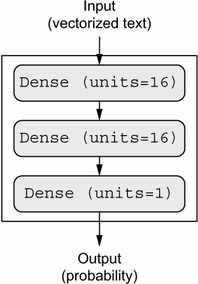



In [143]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

El primer argumento que se pasa a cada capa Dense es el número de unidades de la capa: la dimensionalidad del espacio de representación de la capa.

Recordemos la implementación de cada capa:

```
output = relu(dot(input, W) + b)
```
Tener 16 unidades significa que la matriz de pesos `W` tendrá forma `(input_dimension, 16)`: el producto escalar con `W` proyectará los datos de entrada en un espacio de representación de 16 dimensiones (y luego añadirá el vector de sesgo `b` y aplicará la operación `relu`).

❓❓❓

¿Qué implicaciones tiene el aumento o reducción de la dimensionalidad de la capa

❓❓❓

El aumento de la dimensionalidad de una capa de una red neuronal permite aumentar la capacidad de representación del modelo, es decir, permite modelar funciones más completajas y aprender patrones más complejos. Sin embargo, al contener más parámetros, también necesitan mayor tiempo de entrenamiento y, consecuentemente, más energía. Otra desventaja de aumentar la dimensionalidad de las capas es que la red puede sufrir de overfitting o del desvanecimiento del gradiente al memorizar los datos de entrenamiento en lugar de generalizar.

Por otro lado, si disminuimos la dimensionalidad de la capa existe un menor riesgo de overfitting y se reduce el coste de computación, pero puede que la red no tenga la capacidad suficiente apra aprender patrones complejos en los datos y puede ser que el modelo sufra de underfitting, es decir, que el modelo sea demasiado simple para poder aprender las relaciones importantes de los datos.



Función relu:

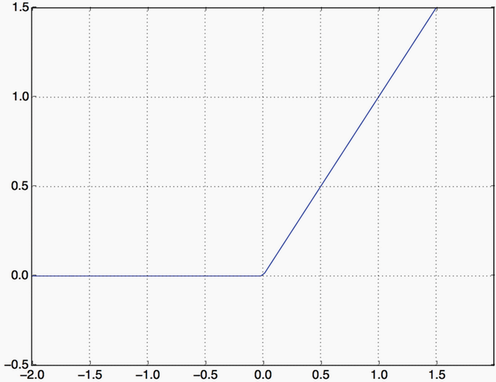

Función sigmoide:

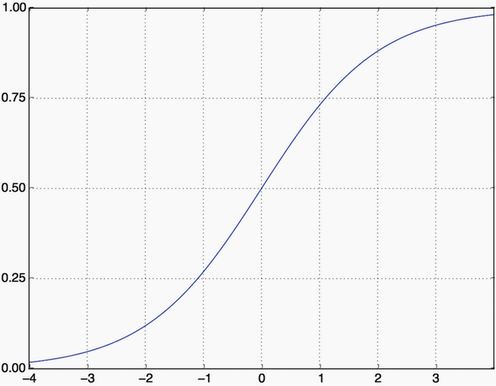

❓❓❓

¿Por qué son necesarias las funciones de activación?

❓❓❓


Si no hubiera funciones de activación la salida del modelo sería lineal. Es decir, las operaciones de la red serían combinaciones lineales de los datos de entrada. Los problemas del mundo real son problemas no lineales.

Las funciones de activación permiten aprender jerarquías de características, distinguir entre diferentes clases de datos y logran que los gradientes fluyan adecuadamente durante el entrenamiento.

**Compilación del modelo**

Como función de pérdida alternativamente podríamos usar `mean_squared_error` aunque en principio la entropía cruzada es más adecuada para trabajar con datos probabilísticos ya que mide la distancia entre distribuciones de probabilidad (*Crossentropy*).

Resumen de la entropía cruzada:

* El error cuadrático medio ($MSE$) no es la función natural de error cuando tenemos salidas probabilísticas, ya que trata por igual cualquier diferencia de error.
* Para problemas de clasificación, deberíamos penalizar más los errores cometidos para la clase correcta ($d_j=1$) que para la incorrecta ($d_j=0$).
* La entropía cruzada ($-\ln $ verosimilitud) es más adecuada para problemas de clasificación ya que compara las dos distribuciones de probabilidad:
\begin{equation}
L = - \frac{1}{N\cdot J} \sum_{p=1}^N\left(\sum_{o=1}^J d_{po} \ln(o_{po}) \right)
\end{equation}


❓❓❓

**EJERCICIO:** ¿Cuáles serían las dos distribuciones de probabilidad?

❓❓❓

La entropía cruzada mide la distancia entre:

**La distribución real** → 𝑑, las clases verdaderas (one-hot).

**La distribución predicha** → 𝑜, las probabilidades predichas por el modelo.

Cuanto más cerca está la distribución predicha de la real, más baja es la entropía cruzada.
Cuando la predicción es perfecta (la probabilidad predicha es 1 para la clase correcta), la entropía cruzada es 0.

In [144]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validación del modelo

**Reservar un conjunto de validación**

Nota: en este conjunto de datos se puede hacer porque los suponemos aleatorizados. **Recuerda conceptos como estratificación al dividir el conjunto de datos en entrenamiento, validación y test**❗❗❗.

In [145]:
print(x_train.shape)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(25000, 10000)


**Entrenar/ajustar el modelo**

Parámetros:
* Datos de entrenamiento y, opcionalmente, de validación
* Épocas
* Tamaño lotes

El siguiente código debería tardar unos 2 segundos por época:

In [146]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7065 - loss: 0.5984 - val_accuracy: 0.8571 - val_loss: 0.4167
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8946 - loss: 0.3534 - val_accuracy: 0.8830 - val_loss: 0.3197
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9188 - loss: 0.2536 - val_accuracy: 0.8852 - val_loss: 0.2943
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9352 - loss: 0.2038 - val_accuracy: 0.8677 - val_loss: 0.3243
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9436 - loss: 0.1754 - val_accuracy: 0.8742 - val_loss: 0.3188
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9510 - loss: 0.1493 - val_accuracy: 0.8856 - val_loss: 0.2821
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9667 - loss: 0.1208 - val_accuracy: 0.8865 - val_loss: 0.2944
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9709 - loss: 0.1023 - val_accuracy: 0.8840 - 

Visualización del modelo:

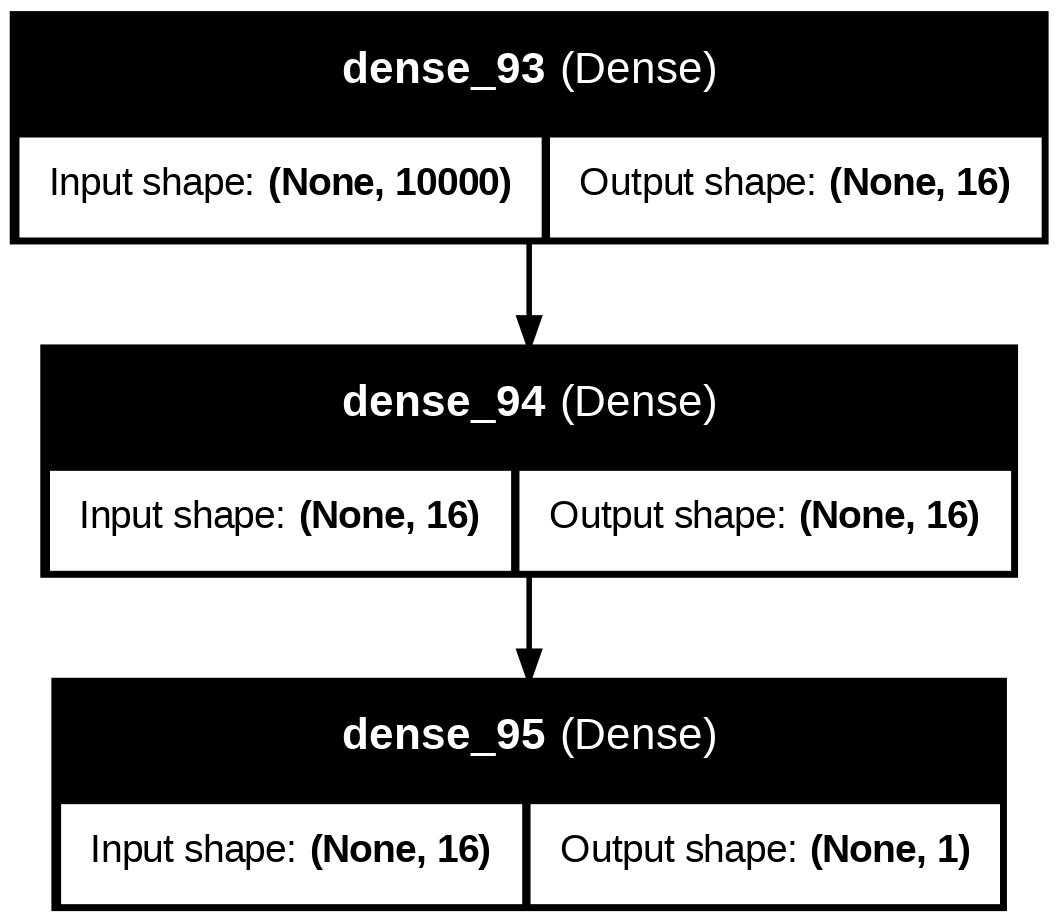

In [147]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


❓❓❓

**EJERCICIO:** ¿Por qué no hemos podido visualizar el modelo hasta ahora?

❓❓❓

Porque antes del entrenamiento no tenemos la información sobre la estructura del modelo al no estar definido completamente. Los pesos y las conexiones entre las capas se actualizan en función de los datos de entrenamiento, por lo que es después del entrenamiento cuando se puede visualizar el modelo completo con todas las conexiones y formas de capas.



Diccionario de historial del ajuste. En nuestro caso tiene 4 entradas, una por cada métrica que se ha monitorizado durante el entrenamiento y la validación.

In [148]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Dibujar la **función de pérdida** en entrenamiento y validación:

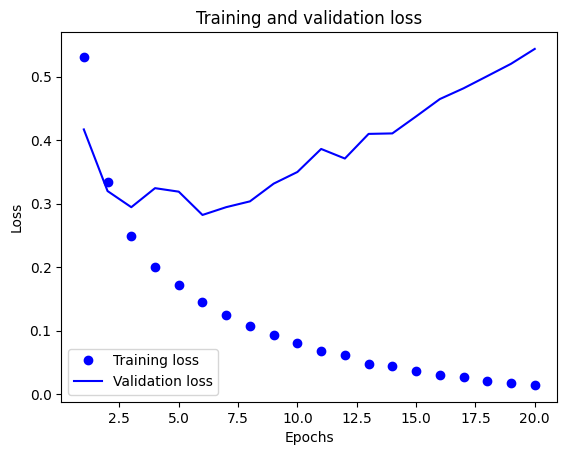

In [149]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dibujar la precisión de entenamiento y validación:

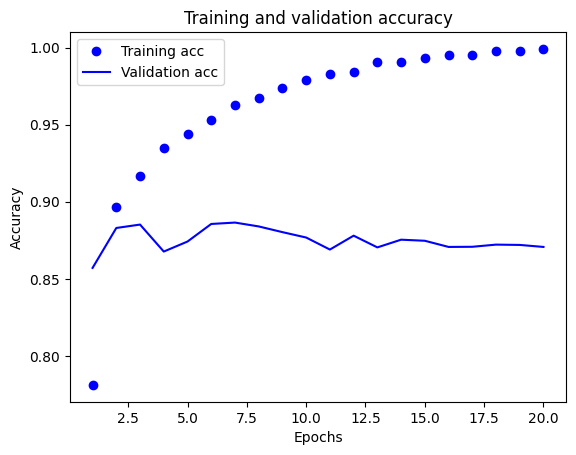

In [150]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓

**EJERCICIO**: ¿Qué observas en las gráficas anteriores?
¿Cómo podríamos tratar de arreglar el problema que observas? (incluye código y gráficas que lo solucione y visualice)

❓❓❓

Las graficas, en el entrenamiento, comienzan a converger adecuadamente, ya que está aprendiendo los datos de entrenamiento durante las épocas. Esto provoca que baje la pérdida en el entrenamiento y aumente el accuracy en el entrenamiento. Sin embargo, las gráficas en validación no se comportan igual. En lugar de disminuir, la pérdida en validación aumenta. Estas características son típicas de un modelo que ha sobreaprendido, es decir, se ha aprendido "de memoria" las características de los datos de entrenamiento, pero no es capaz de generalizar las de validación y por eso falla en ese conjunto.

Podemos aplicar diferentes soluciones como el aumento de datos, disminuir la dimensionalidad de la red (hacerla más simple), cambiar el número de épocas o cambiar otros hiperparámetros.

**Reentrenar el modelo**

Después de nuestro análisis, podemos volver a reentrenar el modelo con otros parámetros. ¿Qué cambiarías?



```
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(...)
model.fit(...)
results = model.evaluate(x_test, y_test)
```

Haz tus pruebas aquí:

In [151]:
# Definir modelo
model = keras.Sequential([
    # layers.Dense(1, activation="relu"),
    # layers.Dense(3, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7473 - loss: 0.2025 - val_accuracy: 0.8625 - val_loss: 0.1346
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8952 - loss: 0.1157 - val_accuracy: 0.8814 - val_loss: 0.1107
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9115 - loss: 0.0923 - val_accuracy: 0.8878 - val_loss: 0.1002
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9235 - loss: 0.0807 - val_accuracy: 0.8900 - val_loss: 0.0944
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9357 - loss: 0.0705 - val_accuracy: 0.8916 - val_loss: 0.0908
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9461 - loss: 0.0621 - val_accuracy: 0.8920 - val_loss: 0.0885
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9516 - loss: 0.0572 - val_accuracy: 0.8921 - val_loss: 0.0867
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9550 - loss: 0.0536 - val_accuracy: 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

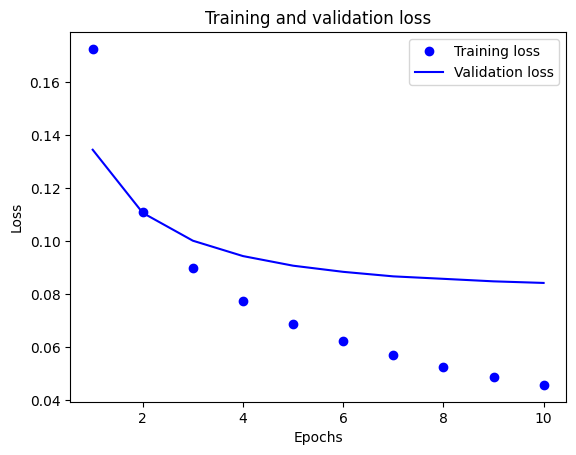

In [152]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

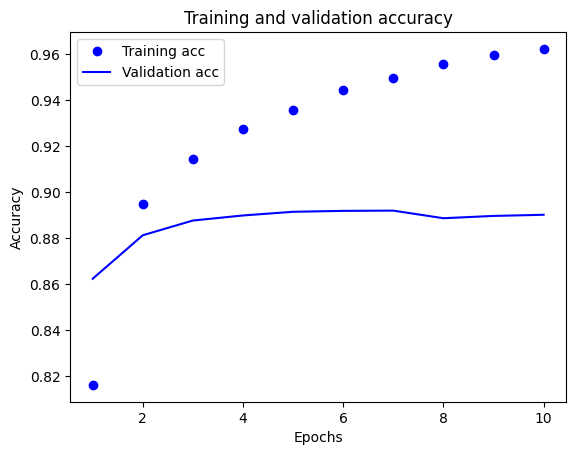

In [153]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Al final el modelo que mejor ha resultado ha sido mantener la última capa sigmoide y quitar las capas densas para simplificar el modelo y evitar el sobreaprendizaje.

Sin embargo, el modelo sigue convergiendo en accuracy alrededor de la quinta época.

### Hacer predicciones en datos nuevos

In [154]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.31322128],
       [0.99561495],
       [0.8507011 ],
       ...,
       [0.18557322],
       [0.21322381],
       [0.50855154]], dtype=float32)

❓❓❓

**EJERCICIO**: Calcula la precisión global y la matriz de confusión en los datos de test (tienes ejemplos en cuadernos anteriores).

❓❓❓

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Global Accuracy: 0.88444


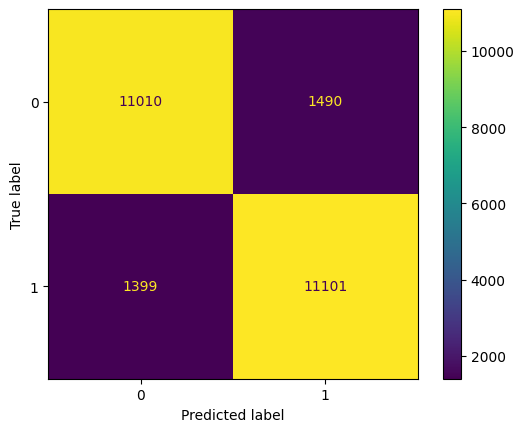

In [155]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicciones en datos de test
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisión global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

### Amplía experimentos:

Los siguientes experimentos te ayudarán a convencerte de que las elecciones de arquitectura que has hecho son bastante razonables, aunque todavía se puede mejorar:

* Hemos utilizado dos capas de representación antes de la capa de clasificación final. Prueba a utilizar una o tres capas ocultas y observa cómo afecta esto a la validación y a la  recisión de la prueba.
* Prueba a utilizar capas con más o menos unidades: 32 unidades, 64 unidades, etc.
* Prueba a utilizar la función de pérdida `mse` en lugar de `binary_crossentropy`.
* Prueba a utilizar la función de activación `tanh` en lugar de `relu`.


❓❓❓

**EJERCICIO**: Como hicimos anterioremente, trata de recoger todo el código del notebook en una sola celda que te permita experimental fácilmente con diferentes arquitecturas y parámetros. Puedes asumir que los datos están ya cargados y procesados y centrarte en los experimentos. Necesitarás:
1. Definir el modelo
1. Compilar el modelo
1. Ajustar el modelo
1. Dibujar gráfica de convergencia
1. Calcular la precisión en test

❓❓❓


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7342 - loss: 0.2047 - val_accuracy: 0.8664 - val_loss: 0.1348
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8957 - loss: 0.1164 - val_accuracy: 0.8808 - val_loss: 0.1113
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9143 - loss: 0.0920 - val_accuracy: 0.8902 - val_loss: 0.1001
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9277 - loss: 0.0783 - val_accuracy: 0.8916 - val_loss: 0.0944
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9374 - loss: 0.0691 - val_accuracy: 0.8919 - val_loss: 0.0906
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9433 - loss: 0.0625 - val_accuracy: 0.8929 - val_loss: 0.0885
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9529 - loss: 0.0564 - val_accuracy: 0.8930 - val_loss: 0.0867
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9556 - loss: 0.0525 - val_accuracy:

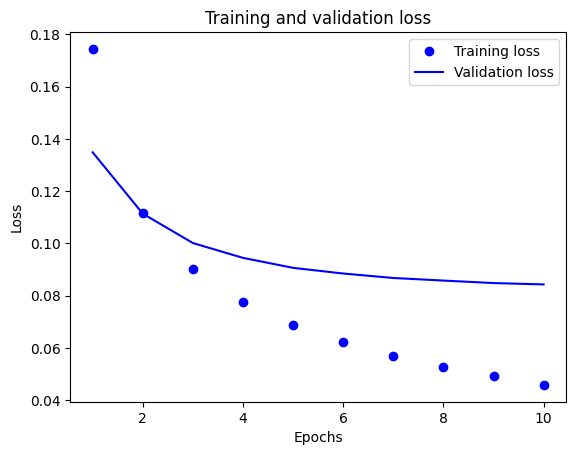

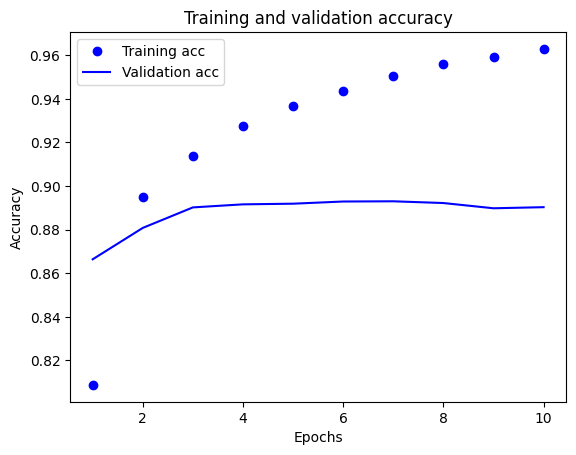

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Global Accuracy: 0.88324


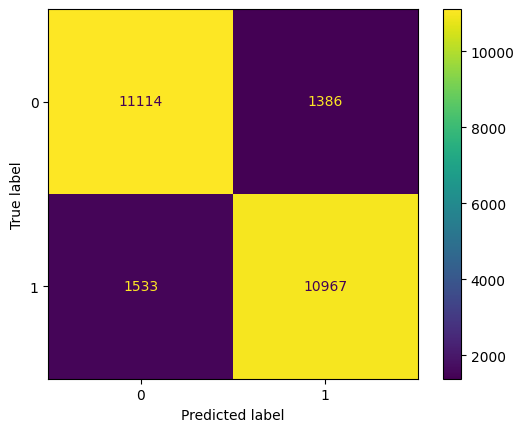

In [156]:
# Definir modelo
model = keras.Sequential([
    # layers.Dense(1, activation="relu"),
    # layers.Dense(3, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar (Ajuste)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

# Graficas de convergencia
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Matriz de confusion
# predicciones en datos de test
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisión global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

### Resumen
* Preprocesamiento
* Las pilas de capas `Dense` con `relu` pueden resolver muchos problemas
* En clasificación binaria siempre terminamos el modelo con una capa `Dense` y activación `sigmoid`.
* Por tanto usamos `binary_crossentropy`.
* Importancia de monitorizar el rendimiento.

## Clasificación multiclase: clasificación de noticias

* Clasificación binaria: categorías mútuamente exclusivas
* Clasificación multiclase
 * Clasificación multiclase de etiqueta única
 * Clasificación multiclase multi-etiqueta

### Conjunto de datos Reuters

Es un conjunto de datos multi-etiqueta donde cada etiqueta representa un *tema* asociado a una noticia. Hay 46 temas diferentes con distinto nivel de representación.

Se puede trabajar como etiqueta simple considerando un tema único principal.

**Cargar el conjunto de datos Reuters**

In [157]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [158]:
print(len(train_data))
print(len(test_data))
print(train_data[10])
print(train_labels[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


**Descodificar las noticias a texto**

In [159]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [160]:
print(decoded_newswire)
print(train_labels[0])
print(train_labels[3])


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3
4


### Preparación de los datos

**Codificación de los datos**

In [161]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [162]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(8982, 10000)


**Codificación de las etiquetas**

Utilizaremos *one-hot encoding* también conocido como *codificación categórica*. Podemos usar la función anterior aunque en realidad Keras, scikit-learn y otros suelen tener funciones para esto:


In [163]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Veamos el resultado:

In [164]:
print(train_labels.shape)
print(test_labels.shape)
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)
(8982, 46)
(2246, 46)


### Construcción del modelo

**Definición del modelo**

❓❓❓ **EJERCICIO:** ¿Qué valor pondrías en HHH y en XXX?❓❓❓

```
model = keras.Sequential([
    layers.Dense(HHH, activation="relu"),
    layers.Dense(HHH, activation="relu"),
    layers.Dense(XXX, activation="softmax")
])
```

In [165]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax") # Numero de clases = 46
])

**Compilación del modelo**

❓❓❓ **EJERCICIO:** ¿Qué función de pérdida pondrías (ver <https://keras.io/api/losses/>)?❓❓❓

In [166]:
model.compile(optimizer="rmsprop",
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

### Validación del diseño

**Conjunto de validación**

In [167]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Entrenamiento/ajuste del modelo**

In [168]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.3307 - loss: 3.5097 - val_accuracy: 0.4750 - val_loss: 2.8883
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4809 - loss: 2.7099 - val_accuracy: 0.5240 - val_loss: 2.3557
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5575 - loss: 2.1970 - val_accuracy: 0.5870 - val_loss: 1.9902
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6225 - loss: 1.8714 - val_accuracy: 0.6280 - val_loss: 1.7298
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6678 - loss: 1.6175 - val_accuracy: 0.6580 - val_loss: 1.5558
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6876 - loss: 1.4582 - val_accuracy: 0.6720 - val_loss: 1.4393
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7131 - loss: 1.2907 - val_accuracy: 0.6840 - val_loss: 1.3541
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7277 - loss: 1.1825 - val_accuracy: 0.6960 - v

**Dibujar la pérdida de entrenamiento y validación**

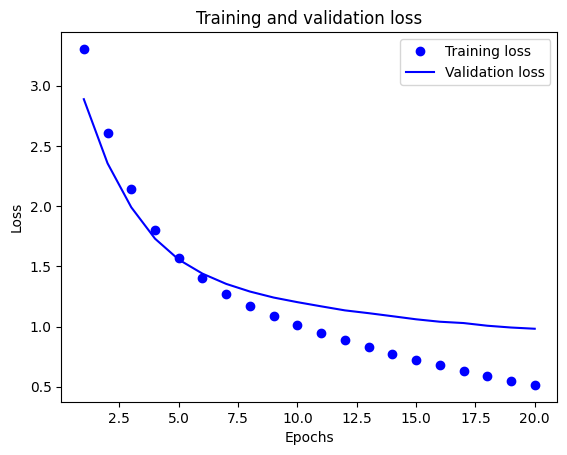

In [169]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Dibujar la precisión en entrenamiento y validación**



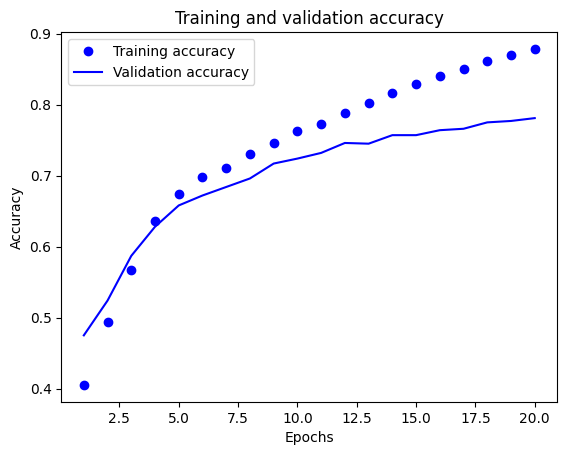

In [170]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓
**EJERCICIO:**
* **¿Detectas sobreajuste?¿Cómo podemos mitigarlo?**

Al principio parece que se ajusta bastante bien la curva de validación, pero conforme van pasando las épocas se va separando más de la curva de entrenamiento.
Podemos reajustar el modelo, cambiarle el número de neuronas que tienen en cada capa o hacerlo más simple para evitar el sobreajuste.

* ¿Qué pasa si usas 1 o 3 capas y con distinto número de neuronas (e.j. 8,64,128)?

Añadir o quitar capas y ajustar el número de neuronas afecta la complejidad y capacidad del modelo para capturar patrones en los datos. El número de neuronas en cada capa determina la complejidad de la representación aprendida, con menos neuronas simplificando el modelo y más neuronas permitiendo una representación más detallada pero potencialmente más compleja.

**Reentrenemos desde cero con nuestras conclusiones**
❓❓❓

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3054 - loss: 2.9777 - val_accuracy: 0.6660 - val_loss: 1.4231
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7158 - loss: 1.2875 - val_accuracy: 0.7370 - val_loss: 1.1660
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7790 - loss: 0.9692 - val_accuracy: 0.7490 - val_loss: 1.0565
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8097 - loss: 0.7849 - val_accuracy: 0.7770 - val_loss: 0.9883
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8532 - loss: 0.6279 - val_accuracy: 0.7740 - val_loss: 0.9676
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8828 - loss: 0.4975 - val_accuracy: 0.7860 - val_loss: 0.9378
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9094 - loss: 0.3860 - val_accuracy: 0.8060 - val_loss: 0.9316
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9256 - loss: 0.3311 - val_accu

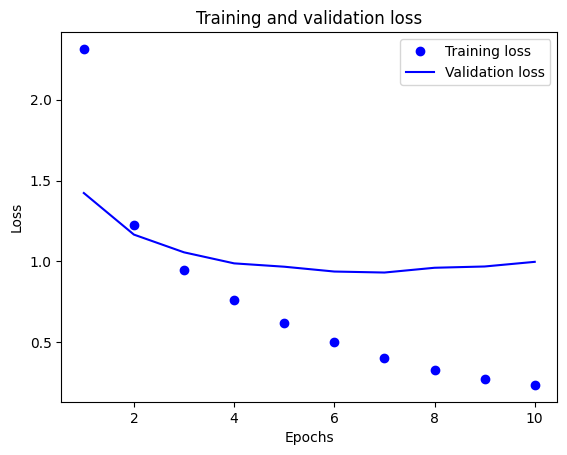

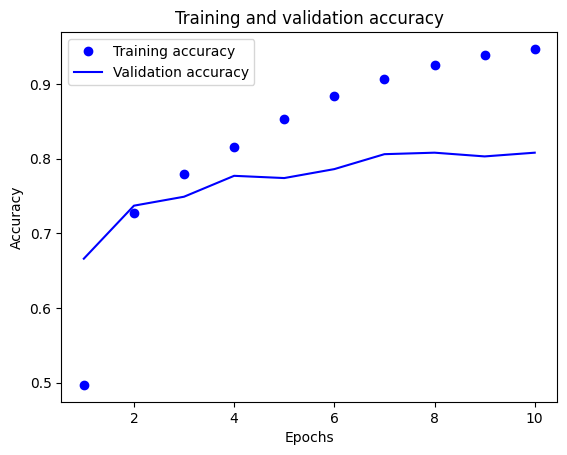

In [171]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Evaluamos en test:

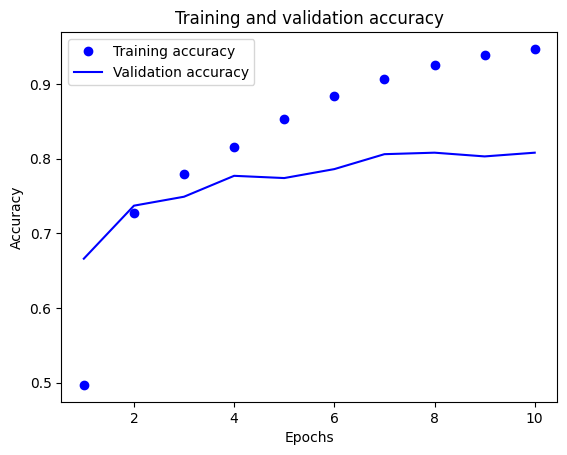

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7734 - loss: 1.1403


[1.159839153289795, 0.7680320739746094]

In [172]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
results

¿Cómo interpretamos estos resultados?¿Son buenos o malos? Para esto tenemos que estimar el rendimiento base. El rendimiento base en un problema binario perfectamente balanceado sería del 50% (un clasificador aleatorio). ¿Cuál es en nuestro caso?

In [173]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1861086375779163)

### Generar predicciones/salidas sobre datos nuevos

In [174]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [175]:
predictions[0].shape

(46,)

In [176]:
np.sum(predictions[0])

np.float32(1.0000001)

In [177]:
np.argmax(predictions[0])

np.int64(4)

### Otra forma de codificar las etiquetas y la pérdida

Como tensor de enteros:

In [178]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Esta variante necesita una función de pérdida diferente:

In [179]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### La importancia de tener capas intermedias suficientemente grandes

grandes ➡ anchas

Antes hemos mencionado que, como la capa de salida tiene 46 dimensiones, hay que evitar las capas intermedias con muchas menos de 46 unidades. Veamos qué sucede cuando introducimos un “cuello de botella” de información al tener capas intermedias que son significativamente menos de 46 dimensiones: por ejemplo, de 4 dimensiones.

**Ejemplo de modelo con un cuello de botella**

In [180]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1071 - loss: 3.4403 - val_accuracy: 0.5000 - val_loss: 2.5045
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5408 - loss: 2.1486 - val_accuracy: 0.5810 - val_loss: 1.7352
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5858 - loss: 1.5592 - val_accuracy: 0.5850 - val_loss: 1.5688
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6147 - loss: 1.3361 - val_accuracy: 0.6210 - val_loss: 1.4908
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6789 - loss: 1.2326 - val_accuracy: 0.6590 - val_loss: 1.4077
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7282 - loss: 1.1240 - val_accuracy: 0.6810 - val_loss: 1.3749
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7669 - loss: 0.9934 - val_accuracy: 0.7050 - val_loss: 1.3432
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7765 - loss: 0.9157 - val_accuracy: 0.7010 - v

### Experimentos adicionales

❓❓❓
**EJERCICIO:**

Después de los experimentos: ¿Cuáles son los parámetros óptimos de tu modelo?

Los mejores parámetros que hemos conseguido han sido los del segundo modelo. Aún así, podríamos haber seguido probando parámetros para mejorar los resultados hasta obtener un modelo más eficiente.

❓❓❓

### Resumen

* ¿Cuántas neuronas de salida tienen los modelos anteriores? 46

* ¿Cuándo utilizamos la función softmax y cuándo la sigmoide? La función softmax se utiliza en la capa de salida de modelos de clasificación multiclase, mientras que la función sigmoide se utiliza en problemas de clasificación binaria o cuando se predice una única probabilidad.

* ¿Qué opciones tenemos para representar las etiquetas en un problema multiclase? Para representar las etiquetas en un problema multiclase, podemos utilizar codificación one-hot, que convierte cada etiqueta en un vector binario donde solo una posición corresponde a la clase y todas las demás son cero.

* ¿Qué principios podemos seguir para diseñar la arquitectura de la red? Al diseñar la arquitectura de la red, podemos seguir principios como la simplicidad, comenzar con una arquitectura básica y aumentar la complejidad según sea necesario, utilizar capas y neuronas suficientes para capturar los patrones de los datos. O empezar con complejidad e ir reduciendo evitando el sobreaprendizaje.

## Ejemplo de regresión: predicción de precios inmobiliarios

### Base de datos Boston Housing Price


Otro tipo común de problema de aprendizaje automático es la **regresión**, que consiste en predecir un valor continuo en lugar de una etiqueta discreta: por ejemplo, predecir la temperatura mañana, dados los datos meteorológicos.

En esta sección, intentaremos predecir el precio medio de las viviendas en un determinado barrio de Boston a mediados de la década de 1970, a partir de datos sobre el barrio en aquel momento, como el índice de criminalidad, el tipo del impuesto local sobre bienes inmuebles, etc. En este caso cada una de las características tiene una escala diferente lo que nos *obligará* a normalizar los datos.

**Carga de Boston housing dataset**

In [181]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [182]:
train_data.shape

(404, 13)

In [183]:
test_data.shape

(102, 13)

In [184]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preprocesado

**Normalizado o estandarizado de datos**

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

> Standardize features by removing the mean and scaling to unit variance.
> The standard score of a sample x is calculated as:
> `z = (x - u) / s`
> where u is the mean of the training samples or zero if with_mean=False, and s > is the standard deviation of the training samples or one if with_std=False.
> Centering and scaling happen independently on each feature by computing the > relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.



In [185]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data) # IMPORTANTE: Los datos de test se escalan con los datos de media y desviación de train

### Construcción del modelo

**Definition**

Al tener pocos patrones vamos a usar un modelo más pequeño para mitigar el posible sobreentrenamiento.

Esta función será útil para el diseño experimental KFold.

En el caso de regresión, es habitual no tener una función de transferencia en la capa de salida para no restringir los valores de salida.

In [186]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validando el diseño con validación K-fold

**K-fold validation**

In [187]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=0)

  # Evaluate the model
  val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)

  all_scores.append(val_mae)

In [188]:
all_scores

[3.083895444869995, 3.6119725704193115, 3.5386569499969482, 3.087714672088623]

In [189]:
import numpy as np
np.mean(all_scores)

np.float64(3.3305599093437195)

**Guardar los logs de validación de cada fold**

In [190]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100 # aumentar a 500
all_mae_histories = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  history = model.fit(X_train, y_train, epochs=num_epochs,
                      validation_data=(X_val, y_val),
                      batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


**Procesamos el historial**

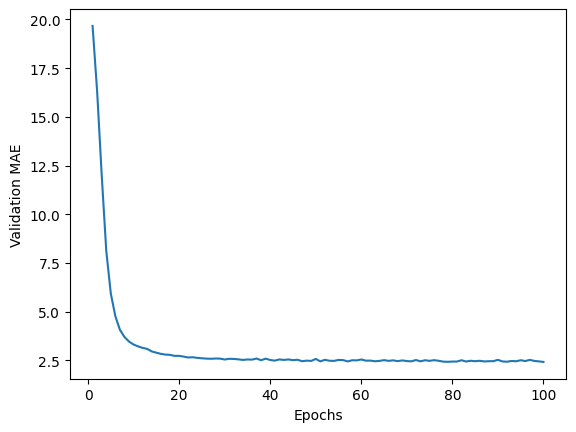

In [191]:
import matplotlib.pyplot as plt
import numpy as np

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Dibujar la puntuación de validación excluyendo los 10 primeros puntos**

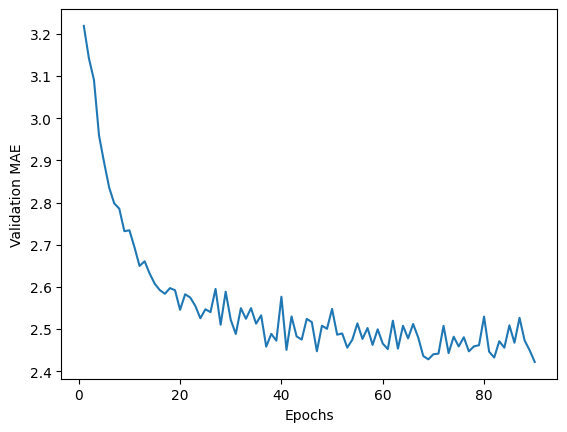

In [192]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Entrenamos el modelo final**

In [193]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.6531 - mae: 2.4807


In [194]:
test_mae_score

2.688500165939331

### Predicciones con datos nuevos

In [195]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([8.507615], dtype=float32)

# Código completo

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7424 - loss: 0.2028 - val_accuracy: 0.8643 - val_loss: 0.1344
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8927 - loss: 0.1176 - val_accuracy: 0.8813 - val_loss: 0.1107
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9120 - loss: 0.0925 - val_accuracy: 0.8876 - val_loss: 0.1003
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9294 - loss: 0.0770 - val_accuracy: 0.8910 - val_loss: 0.0945
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9381 - loss: 0.0699 - val_accuracy: 0.8921 - val_loss: 0.0909
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9455 - loss: 0.0618 - val_accuracy: 0.8917 - val_loss: 0.0886
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9524 - loss: 0.0571 - val_accuracy: 0.8915 - val_loss: 0.0869
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9524 - loss: 0.0551 - val_accurac

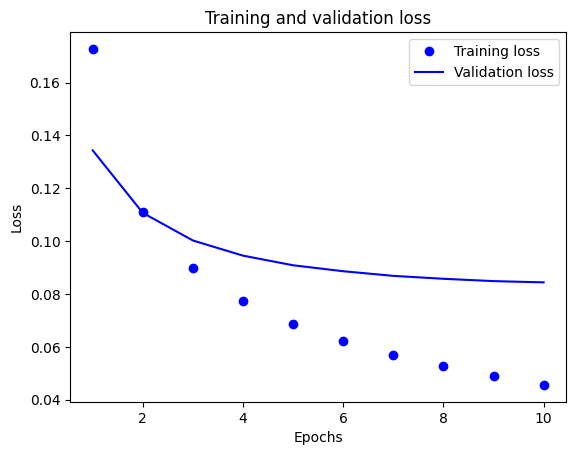

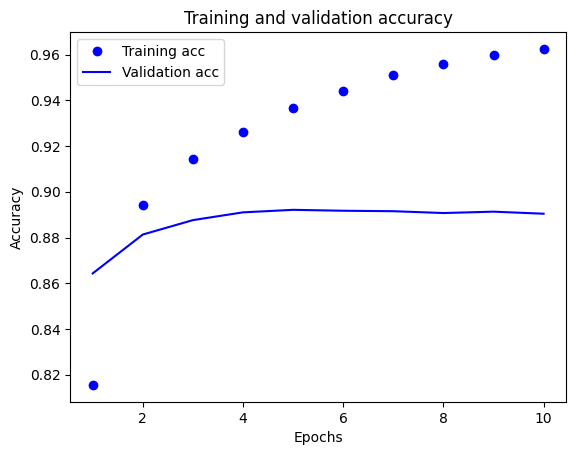

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Global Accuracy: 0.88348


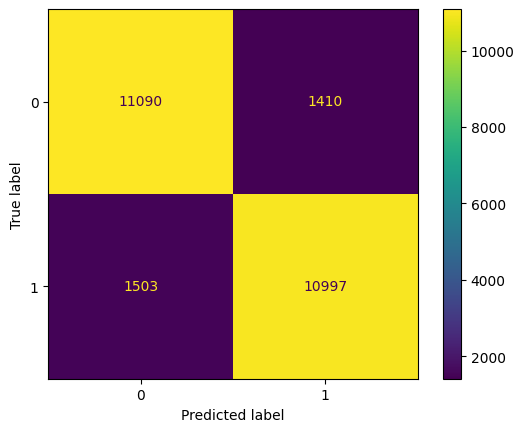

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3968 - loss: 2.6704 - val_accuracy: 0.6710 - val_loss: 1.4024
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7111 - loss: 1.2804 - val_accuracy: 0.7440 - val_loss: 1.1290
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7854 - loss: 0.9365 - val_accuracy: 0.7680 - val_loss: 1.0165
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8403 - loss: 0.6953 - val_accuracy: 0.7940 - val_loss: 0.9407
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8669 - loss: 0.5530 - val_accuracy: 0.8050 - val_loss: 0.9100
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8935 - loss: 0.4648 - val_accuracy: 0.8130 - val_loss: 0.9126
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9245 - loss: 0.3468 - val_accuracy: 0.8080 - val_loss: 0.9157
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9388 - loss: 0.2877 - val_accu

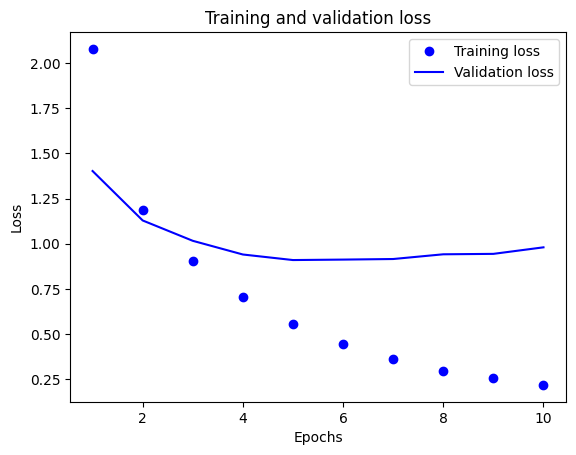

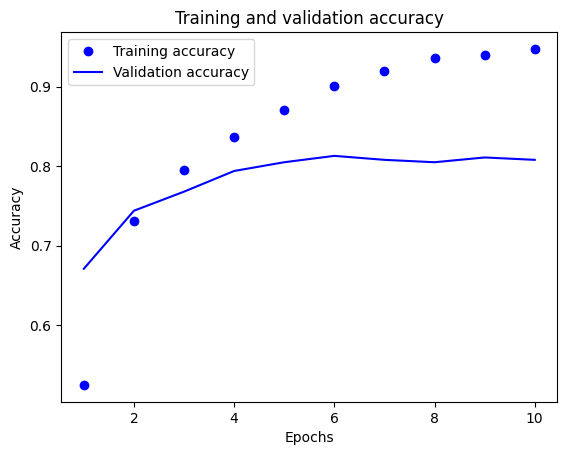

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

## Conjunto de datos de IMBD

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Definir modelo
model = keras.Sequential([
    # layers.Dense(1, activation="relu"),
    # layers.Dense(3, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar (Ajuste)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

# Graficas de convergencia
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Matriz de confusion
# predicciones en datos de test
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisión global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


## Conjunto de datos de Reuters
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()